# HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Linear Regression Exercise

## Table of Contents

* [Introduction](#Introduction)
  * [Required Knowledge](#Required-Knowledge)
  * [Required Python Modules](#Required-Python-Modules)


* [Linear Regression](#Linear-Regression)
  * [Hypothesis](#Hypothesis)
  * [Exercise: Cost](#Exercise:-Cost)
  * [Exercise: Gradient](#Exercise:-Gradient)
  * [Exercise: Stochastic Gradient Descent](#Exercise:-Stochastic-Gradient-Descent)
  * [Exercise: Plot Cost per Epoch](#Exercise:-Plot-Cost-per-Epoch)


* [Summary and Outlook](#Summary-and-Outlook)
* [Licenses](#Licenses)

## Introduction

Goal of this exercise is to implement Linear Regression in Python. You can use the Python standard library and math functions from numpy. This notebook guides you through the implementation process.

This notebooks implements tests using `assert` or `np.testing.assert_almost_equal`. If you run the corresponding notebook cell and no output appears, the test has passed. Otherwise an exception is raised.

**General Hint:**

If you have problems with the implementation (e.g. you don't know how to call a certain function or you don't know how to loop through the dataset), make use of the interactive nature of the notebook. You can at all times add new cells to the notebook to inspect defined variables or to try small code snippets.

### Required Knowledge

This exercise is part of the course "Aktuelle Trends der Informations- und Kommunikationstechnik". The fundamentals of Linear Regression are taught in class.

* The PDF slides used in class are [available](../../../../../slides/courses/htw-berlin/informatik-und-wirtschaft/aktuelle-trends/linear-regression.pdf) in the educational-materials repository.
* For other teaching materials refer to Chapter 2 of the open classroom [Machine Learning](http://openclassroom.stanford.edu/MainFolder/CoursePage.php?course=MachineLearning) by Andrew Ng.

### Required Python Modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from deep_teaching_commons.data.fundamentals.iris import Iris

/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/christoph/.local/share/virtualenvs/educational-materials-Ei5qxOuI/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Required Data

In [2]:
base_data_dir = os.path.expanduser('~/deep.TEACHING/data')
dm = Iris(base_data_dir=base_data_dir)  # data manager
iris = dm.dataframe()

auto download is active, attempting download
data directory already exists, no download required


In [3]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
X = iris['petal_width'].values
Y = iris['petal_length'].values

In [5]:
X[:5]

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [6]:
Y[:5]

array([1.4, 1.4, 1.3, 1.5, 1.4])

In [7]:
X.shape, Y.shape

((150,), (150,))

Scale `X` using the Scikit-Learn `StandardScaler`.

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1)).flatten()

In [9]:
X_scaled[:5]

array([-1.31297673, -1.31297673, -1.31297673, -1.31297673, -1.31297673])

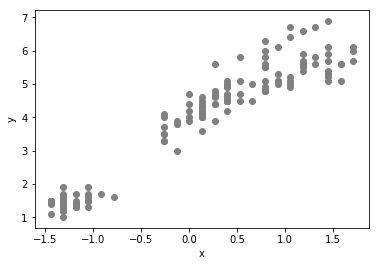

In [10]:
plt.scatter(X_scaled, Y, c='grey')
plt.xlabel('x')
plt.ylabel('y');

## Linear Regression

### Hypothesis

The linear hypothesis is defined as follows:

$$
h(x) = x \cdot w + b
$$

The hypothesis is a function of `x`, where the parameters `w` and `b` are treated as constants.

As the following code shows, in Python we can use a *closure* to create functions with built-in constant values. Work through the given code below, it is used as an example for the following exercises.

In [11]:
def linear_hypothesis(w, b):
    # this is a closure
    def h(x):
        return x * w + b
    
    return h

In [12]:
w = 1.9
b = 3.8
# create a function h with constant values for w and b
h = linear_hypothesis(w, b)

In [13]:
# as you can see h is function
type(h)

function

The hypothesis $h$ is used to predict values for $y$ given $x$.

In [14]:
# -1.2 is a useful value for x because we have already scaled x
# take a look at your plot above for comparison
x = -1.2
h(x)  # apply function

1.52

In [15]:
# run a test
np.testing.assert_almost_equal(h(-1.2), 1.52)

## Exercise: Cost

The cost function is defined as follows:

$$
J(w, b) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_{w, b}(x_i) - y_i)^2
$$

Implement this function using a closure, similar to the `linear_hypothesis` function above. The mean squared error cost function $J$ loops through the complete dataset of X and Y, to sum over the the squared distances between $h(x_i)$ (prediction) and $y_i$. As a last step the summation is divided by $2m$, where $m$ is the number of samples in $X$.

$J$ is a function of $w$ and $b$, because we want to find the best parameters $w$ and $b$ providing the lowest possible cost. Therefore the data $X$ and $Y$ is treated as a constant. You can use the already implemented function `linear_hypothesis` inside of $J$ to create a new hypothesis.

In [16]:
def make_mse_cost(X, Y):
    def mse_cost(w, b):
        raise NotImplementedError('implement this function')
    
    return mse_cost

In [18]:
J = make_mse_cost(X, Y)

In [19]:
w = 1.9
b = 3.8
J(w, b)  # apply function

2.832163333333332

In [20]:
# run a test
np.testing.assert_almost_equal(J(1.9, 3.8), 2.832163333333332)

## Exercise: Gradient

The partial derivatives (gradient) are used by the Stochastic Gradient Descent optimizer and are defined as follows:

$$
\begin{align}
\frac{\partial}{\partial w} J(w, b) &= \frac{1}{m}\sum_{i=1}^{m}(h_{w, b}(x_i) - y_i) \cdot x_i\\
\frac{\partial}{\partial b} J(w, b) &= \frac{1}{m}\sum_{i=1}^{m}(h_{w, b}(x_i) - y_i)
\end{align}
$$

Implement a function `gradient`, which calculates at a point $w, b$ the partial derivatives $pd\_w$ and $pd\_b$. Return both values from the function.

In [21]:
def make_gradient(X, Y):
    def gradient(w, b):
        raise NotImplementedError('implement this function')
        
        pd_w = None
        pd_b = None
        
        return pd_w, pd_b
    
    return gradient

In [23]:
gradient = make_gradient(X_scaled, Y)

In [24]:
w = 1.9
b = 3.8
gradient(w, b)  # apply function

(0.20696354830509436, 0.04133333333333284)

In [25]:
# run a test
np.testing.assert_almost_equal(gradient(1.9, 3.8), (0.20696354830509436, 0.04133333333333284))

## Exercise: Stochastic Gradient Descent

The following pseude code shows the iterative parameter updates of Stochastic Gradient Descent:

---

Randomly initialize w and b.

For a number of epochs repeat:


$$
\begin{align}
pd\_w &:= \frac{\partial}{\partial w} J(w, b)\\
pd\_b &:= \frac{\partial}{\partial b} J(w, b)\\\\
w &:= w - \alpha * pd\_w\\
b &:= b - \alpha * pd\_b
\end{align}
$$

---

The function to be implemented is `stochastic_gradient_descent(X, Y, w, b, alpha, epochs)`, where `X, Y` is the data, `w, b` are the randomly initialized parameters, `alpha` is the learning rate and `epochs` is the number of training iterations. You should return the values of $w$ and $b$, as well as a list of the cost after each training epoch.

In [26]:
def sgd(X, Y, w, b, alpha, epochs):
    raise NotImplementedError('implement this function')
    
    cost_per_epoch = []
    
    return w, b, cost_per_epoch

In [28]:
alpha = 0.1
epochs = 100
w, b = np.random.randn(2)
w, b, cost_per_epoch = sgd(X_scaled, Y, w, b, alpha, epochs)  # Implementierung in der Übung
w, b

(1.6930155401974578, 3.758531090722138)

In [29]:
len(cost_per_epoch)

100

In [30]:
# run tests
test_w, test_b, test_cost_per_epoch = sgd(X_scaled, Y, 1.292771109464669, -1.2955399908557792, 0.1, 100)
np.testing.assert_almost_equal(len(test_cost_per_epoch), 100)
np.testing.assert_almost_equal((test_w, test_b), (1.6930258200874897, 3.7585324198675756))

## Exercise: Plot Cost per Epoch

Plot `cost_per_epoch` result of `sgd`.

In [31]:
def plot_over_time(cost_per_epoch):
    raise NotImplementedError('implement this function')

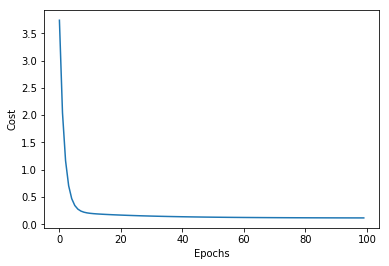

In [33]:
alpha = 0.1
epochs = 100
w, b = np.random.randn(2)
w, b, cost_per_epoch = sgd(X, Y, w, b, alpha, epochs)
plot_over_time(cost_per_epoch)

You can try out different `alpha` values and see how the training performance changes.

## Summary and Outlook

You have learned how to implement Linear Regression with one input and one output variable to solve simple regression problems. The algorithms were implemented in Python, without the help of higher level libraries like Tensorflow or Keras.

The next part of the course covers Logistic Regression for classification tasks.

## Licenses

### Notebook License (CC-BY-SA 4.0)

*The following license applies to the complete notebook, including code cells. It does however not apply to any referenced external media (e.g. images).*

HTW-Berlin - Informatik und Wirtschaft - Aktuelle Trends - Machine Learning: Linear Regression Exercise<br/>
by [Christoph Jansen (deep.TEACHING - HTW Berlin)](https://www.htw-berlin.de/hochschule/personen/person/?eid=9225)<br/>
is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).<br/>
Based on a work at https://gitlab.com/deep.TEACHING.


### Code License (MIT)

*The following license only applies to code cells of the notebook.*

Copyright 2018 Christoph Jansen

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.